In [1]:
#19 Financial Time Series 2

In [2]:
#Rolling Statics

In [3]:
sym = 'AAPL.O'
filename = 'data/tr_eikon_eod_data.csv'

In [4]:
import pandas as pd
import numpy as np
data = pd.read_csv(filename,index_col = 0,parse_dates = True)
data = pd.DataFrame(data[sym]).dropna()
data.tail()

,AAPL.O
Date,
2018-06-25,182.17
2018-06-26,184.43
2018-06-27,184.16
2018-06-28,185.50
2018-06-29,185.11


In [5]:
# An overview

In [6]:
window = 20

In [7]:
data['min'] = data[sym].rolling(window=window).min() 

In [8]:
data['mean'] = data[sym].rolling(window=window).mean() 

In [9]:
data['std'] = data[sym].rolling(window=window).std() 

In [10]:
data['median'] = data[sym].rolling(window=window).median() 

In [11]:
data['max'] = data[sym].rolling(window=window).max() 

In [12]:
data['ewma'] = data[sym].ewm(halflife = 0.5,min_periods=window).mean()

In [13]:
data.dropna().plot()

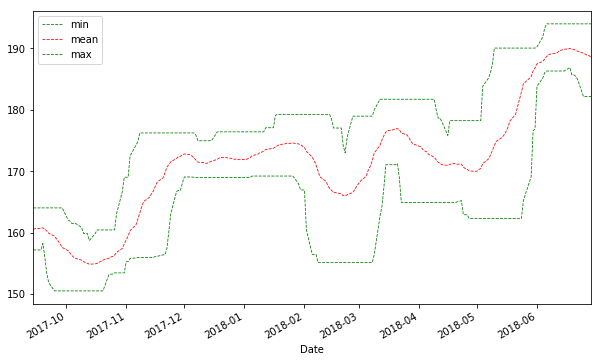

In [14]:
ax = data[['min','mean','max']].iloc[-200:].plot(
        figsize = (10,6),style = ['g--','r--','g--'],lw = 0.8)

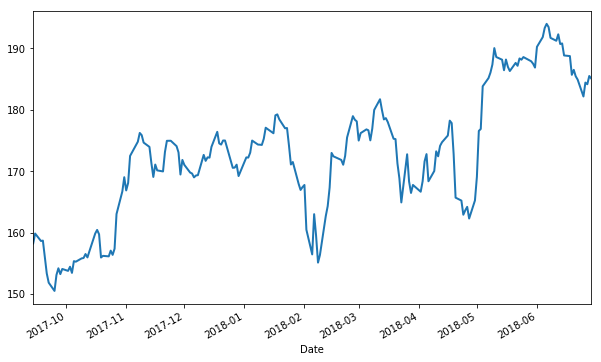

In [15]:
data[sym].iloc[-200:].plot(figsize=(10,6),lw = 2.0)

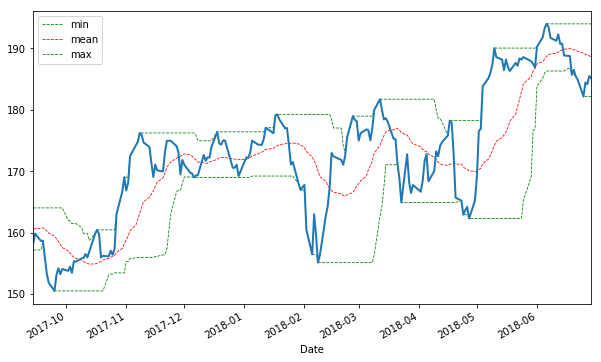

In [16]:
ax = data[['min','mean','max']].iloc[-200:].plot(
        figsize = (10,6),style = ['g--','r--','g--'],lw = 0.8)
data[sym].iloc[-200:].plot(figsize=(10,6),lw = 2.0)

In [17]:
#A Technical Analysis Example

In [18]:
data['SMA1'] = data[sym].rolling(window=42).mean()
data['SMA2'] = data[sym].rolling(window=252).mean()

In [19]:
data.head()

,AAPL.O,min,mean,std,median,max,ewma,SMA1,SMA2
Date,,,,,,,,,
2010-01-04,30.572827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,30.625684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,30.138541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,30.082827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,30.282827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
data[[sym,'SMA1','SMA2']].tail()

,AAPL.O,SMA1,SMA2
Date,,,
2018-06-25,182.17,185.606190,168.265556
2018-06-26,184.43,186.087381,168.418770
2018-06-27,184.16,186.607381,168.579206
2018-06-28,185.50,187.089286,168.736627
2018-06-29,185.11,187.470476,168.901032


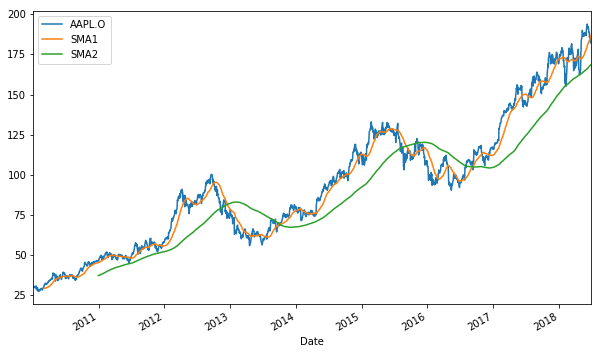

In [21]:
data[[sym,'SMA1','SMA2']].plot(figsize=(10,6))

In [22]:
data.dropna(inplace = True)

In [23]:
data['positions'] = np.where(data['SMA1'] > data['SMA2'],1,-1)

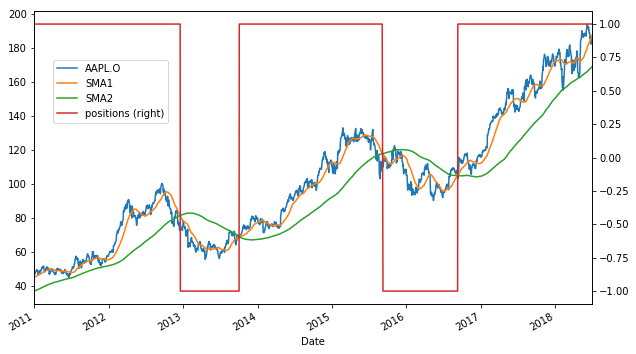

In [24]:
ax = data[[sym,'SMA1','SMA2','positions']].plot(figsize=(10,6),secondary_y = 'positions')
ax.get_legend().set_bbox_to_anchor((0.25,0.85))

In [25]:
#Regression Analysis

In [26]:
#The data

In [27]:
raw = pd.read_csv('data/tr_eikon_eod_data.csv',index_col = 0,parse_dates = True)
raw.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


In [28]:
data = raw[['.SPX','.VIX']].dropna()
data.tail()

,.SPX,.VIX
Date,,
2018-06-25,2717.07,17.33
2018-06-26,2723.06,15.92
2018-06-27,2699.63,17.91
2018-06-28,2716.31,16.85
2018-06-29,2718.37,16.09


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F5E1BF550>,
      dtype=object)

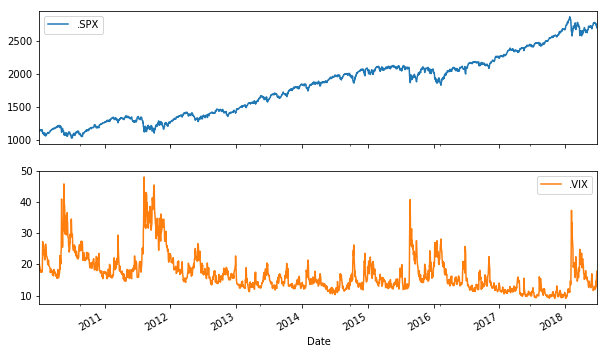

In [29]:
data.plot(subplots=True,figsize=(10,6))

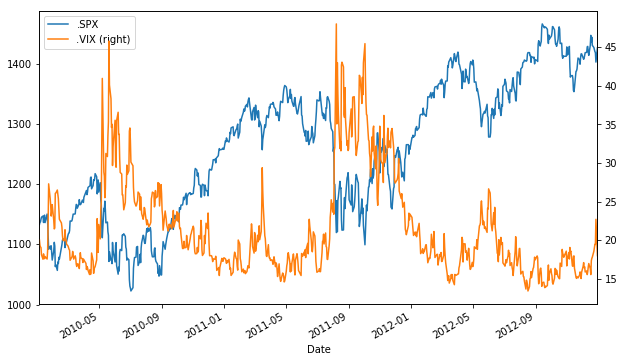

In [30]:
data[:'2012-12-31'].plot(secondary_y = '.VIX',figsize=(10,6))

In [31]:
data[:'2012-12-31'].tail()

,.SPX,.VIX
Date,,
2012-12-24,1426.66,18.59
2012-12-26,1419.83,19.48
2012-12-27,1418.10,19.47
2012-12-28,1402.43,22.72
2012-12-31,1426.19,18.02


In [32]:
#Log Return

In [33]:
rets = np.log(data/data.shift(1))
rets.head()

,.SPX,.VIX
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.003111,-0.035038
2010-01-06,0.000545,-0.009868
2010-01-07,0.003993,-0.005233
2010-01-08,0.002878,-0.050024


In [34]:
rets.dropna(inplace = True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F5F2B5438>,
      dtype=object)

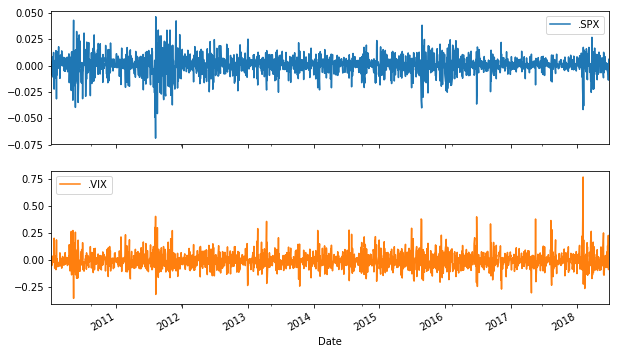

In [35]:
rets.plot(subplots=True,figsize=(10,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F5F3FA5C0>,
      dtype=object)

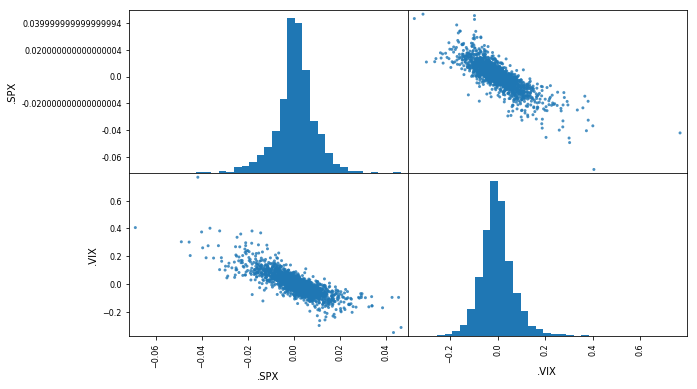

In [36]:
pd.plotting.scatter_matrix(rets,alpha = 0.8,diagonal='hist',
                           hist_kwds={'bins':35},figsize=(10,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F5F296C88>,
      dtype=object)

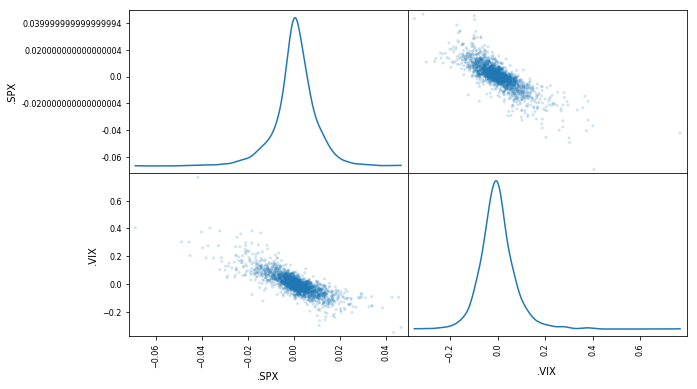

In [37]:
pd.plotting.scatter_matrix(rets,alpha=0.2,diagonal='kde',figsize=(10,6))

In [38]:
#OLS Regression

In [39]:
reg = np.polyfit(rets['.SPX'],rets['.VIX'],deg = 1)#一次函数做配试

In [40]:
reg #b1,bo

array([-6.65160028e+00,  2.62132142e-03])

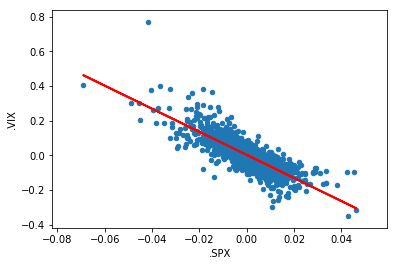

In [43]:
ax = rets.plot(kind = 'scatter',x = '.SPX',y = '.VIX')
ax.plot(rets['.SPX'], np.polyval(reg, rets['.SPX']), 'r', lw=2)

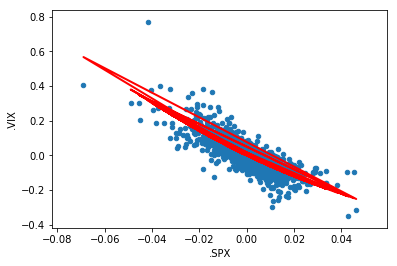

In [61]:
reg = np.polyfit(rets['.SPX'],rets['.VIX'],deg = 2)
ax = rets.plot(kind = 'scatter',x = '.SPX',y = '.VIX')
ax.plot(rets['.SPX'], np.polyval(reg, rets['.SPX']), 'r', lw=2)

In [55]:
#Correlation

In [56]:
rets.corr()

,.SPX,.VIX
.SPX,1.000000,-0.804382
.VIX,-0.804382,1.000000


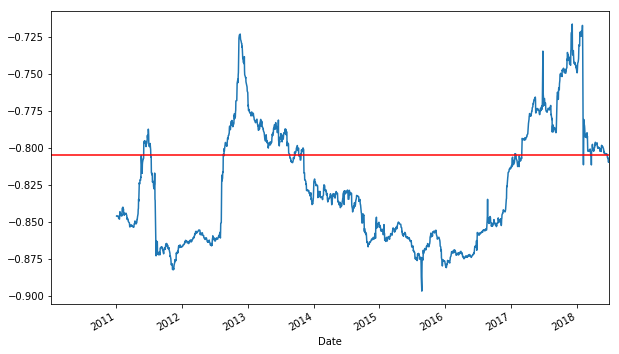

In [59]:
ax = rets['.SPX'].rolling(window=252).corr(
    rets['.VIX']).plot(figsize=(10, 6))
ax.axhline(rets.corr().iloc[0, 1], c='r');

In [62]:
#High Frenquency Data

In [67]:
%%time
tick = pd.read_csv('data/fxcm_eur_usd_tick_data.csv',index_col = 0,parse_dates = True)

Wall time: 1.22 s


In [68]:
tick.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 461357 entries, 2018-06-29 00:00:00.082000 to 2018-06-29 20:59:00.607000
Data columns (total 2 columns):
Bid    461357 non-null float64
Ask    461357 non-null float64
dtypes: float64(2)
memory usage: 10.6 MB


In [69]:
tick.head()

,Bid,Ask
2018-06-29 00:00:00.082,1.15635,1.15636
2018-06-29 00:00:00.106,1.15634,1.15636
2018-06-29 00:00:00.114,1.15634,1.15635
2018-06-29 00:00:00.121,1.15634,1.15634
2018-06-29 00:00:00.151,1.15632,1.15634


In [70]:
tick.tail()

,Bid,Ask
2018-06-29 20:59:00.011,1.16815,1.16859
2018-06-29 20:59:00.279,1.16815,1.16860
2018-06-29 20:59:00.511,1.16816,1.16861
2018-06-29 20:59:00.584,1.16817,1.16862
2018-06-29 20:59:00.607,1.16816,1.16861


In [72]:
tick['Mean'] = tick.mean(axis = 1)

In [73]:
tick.head()

,Bid,Ask,Mean
2018-06-29 00:00:00.082,1.15635,1.15636,1.156355
2018-06-29 00:00:00.106,1.15634,1.15636,1.156350
2018-06-29 00:00:00.114,1.15634,1.15635,1.156345
2018-06-29 00:00:00.121,1.15634,1.15634,1.156340
2018-06-29 00:00:00.151,1.15632,1.15634,1.156330


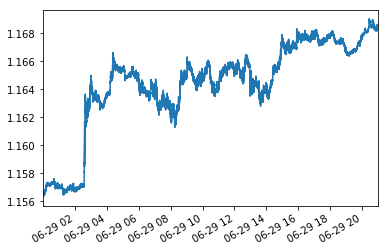

In [76]:
tick['Mean'].plot()

In [77]:
tick_resam = tick.resample(rule='5min',label = 'right').last()

In [81]:
tick_resam.head()

,Bid,Ask,Mean
2018-06-29 00:05:00,1.15649,1.15651,1.156500
2018-06-29 00:10:00,1.15671,1.15672,1.156715
2018-06-29 00:15:00,1.15725,1.15727,1.157260
2018-06-29 00:20:00,1.15720,1.15722,1.157210
2018-06-29 00:25:00,1.15711,1.15712,1.157115


In [82]:
tick_resam.shape

(252, 3)

In [83]:
tick_resam.tail()

,Bid,Ask,Mean
2018-06-29 20:40:00,1.16879,1.16882,1.168805
2018-06-29 20:45:00,1.16850,1.16853,1.168515
2018-06-29 20:50:00,1.16820,1.16826,1.168230
2018-06-29 20:55:00,1.16824,1.16836,1.168300
2018-06-29 21:00:00,1.16816,1.16861,1.168385


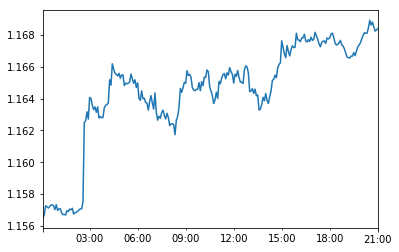

In [85]:
tick_resam['Mean'].plot()